In [1]:
import numpy as np
import pandas as pd
import itertools 
import matplotlib.pyplot as plt

In [2]:
df_sura = pd.read_csv("grupoSura.csv")
df_sura

,Date,Price,Open,High,Low,Vol.,Change %
0,12/28/2023,"29,000.0","29,700.0","29,700.0","29,000.0",7.67K,-2.36%
1,12/27/2023,"29,700.0","29,700.0","29,800.0","29,440.0",7.76K,0.00%
2,12/26/2023,"29,700.0","29,780.0","29,780.0","29,700.0",2.95K,-0.27%
3,12/22/2023,"29,780.0","29,800.0","29,800.0","29,740.0",4.83K,-0.73%
4,12/21/2023,"30,000.0","29,000.0","30,000.0","28,800.0",13.51K,3.45%
...,...,...,...,...,...,...,...
903,01/09/2020,"33,400.0","33,180.0","33,440.0","33,160.0",92.22K,0.00%
904,01/08/2020,"33,400.0","33,980.0","33,980.0","33,140.0",82.41K,-0.89%
905,01/07/2020,"33,700.0","33,840.0","34,000.0","33,700.0",35.39K,-1.46%
906,01/03/2020,"34,200.0","33,360.0","34,340.0","33,360.0",139.79K,0.59%


# Preprocesamiento

In [3]:
df_sura = df_sura.drop(columns=['Open','High','Low','Vol.'])
new_col = []
for percentage in df_sura['Change %']:
    new_col.append(float(percentage.strip('%')))
df_sura = df_sura.drop(columns=['Change %'])
df_sura.insert(2, 'Change%', new_col, True)

In [4]:
df_sura['Change%']

0     -2.36
1      0.00
2     -0.27
3     -0.73
4      3.45
       ... 
903    0.00
904   -0.89
905   -1.46
906    0.59
907    0.00
Name: Change%, Length: 908, dtype: float64

# Definición de estados

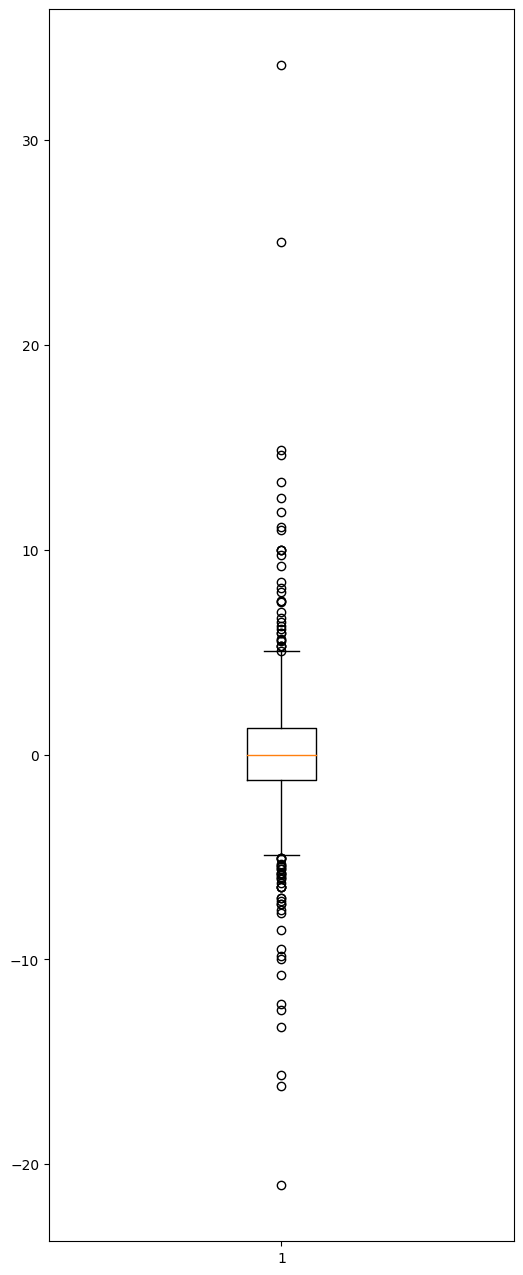

In [5]:
plt.figure(figsize=(6, 16))
plt.boxplot(df_sura['Change%'])

plt.show()

In [6]:
#8 estados, por desviacion general - RECHAZADA
new_col = []
desviacion = np.std(df_sura['Change%'])

for percentage in df_sura['Change%']:
    if percentage > (3 * desviacion):
        new_col.append('S4')
    elif percentage > (2 * desviacion):
        new_col.append('S3')
    elif percentage > desviacion:
        new_col.append('S2')
    elif percentage > 0:
        new_col.append('S1')
    elif percentage > -(desviacion):
        new_col.append('B1')
    elif percentage > -(2 * desviacion):
        new_col.append('B2')
    elif percentage > -(3 * desviacion):
        new_col.append('B3')
    else:
        new_col.append('B4')

In [7]:
#8 estados, por desviacion local - ACEPTADA
new_col = []
l = 30
data = df_sura['Change%']

for i, percentage in enumerate(data):
    min = int(i - l/2)
    max = int(i + l/2)
    if(i <= l/2):
        min = 0
        max = l
    elif(i >= len(data) - (l/2)):
        min = len(data) - l
        max = len(data)
        
    desviacion = np.std(data[min:max])

    if percentage > (3 * desviacion):
        new_col.append('S4')
    elif percentage > (2 * desviacion):
        new_col.append('S3')
    elif percentage > desviacion:
        new_col.append('S2')
    elif percentage > 0:
        new_col.append('S1')
    elif percentage > -(desviacion):
        new_col.append('B1')
    elif percentage > -(2 * desviacion):
        new_col.append('B2')
    elif percentage > -(3 * desviacion):
        new_col.append('B3')
    else:
        new_col.append('B4')

In [8]:
#6 estados, por desviacion local - ACEPTADA
new_col = []
l = 20
data = df_sura['Change%']

for i, percentage in enumerate(data):
    min = int(i - l/2)
    max = int(i + l/2)
    if(i <= l/2):
        min = 0
        max = l
    elif(i >= len(data) - (l/2)):
        min = len(data) - l
        max = len(data)
        
    desviacion = np.std(data[min:max])

    if percentage > (2 * desviacion):
        new_col.append('S3')
    elif percentage > desviacion:
        new_col.append('S2')
    elif percentage > 0:
        new_col.append('S1')
    elif percentage > -(desviacion):
        new_col.append('B1')
    elif percentage > -(2 * desviacion):
        new_col.append('B2')
    else:
        new_col.append('B3')

In [9]:
#5 estados, interpretacion de la grafica de caja y bigotes - ACEPTADA
new_col = []
for percentage in df_sura['Change%']:
    if percentage > 5:
        new_col.append('Sube+')
    elif percentage > 1:
        new_col.append('Sube')
    elif percentage > -1:
        new_col.append('Estable')
    elif percentage > -5:
        new_col.append('Baja')
    else:
        new_col.append('Baja+')
df_sura.insert(2, 'Estado', new_col, True)

In [10]:
#5 estados, por desviacion general - RECHAZADA
new_col = []
l = 20
data = df_sura['Change%']
desviacion = np.std(data)

for i, percentage in enumerate(data):
    if percentage > (2 * desviacion):
        new_col.append('Sube+')
    elif percentage > (desviacion/2):
        new_col.append('Sube')
    elif percentage > -(desviacion/2):
        new_col.append('Estable')
    elif percentage > -(2 * desviacion):
        new_col.append('Baja')
    else:
        new_col.append('Baja+')

In [11]:
#5 estados, por desviacion local - ACEPTADA
new_col = []
l = 20
data = df_sura['Change%']

for i, percentage in enumerate(data):
    min = int(i - l/2)
    max = int(i + l/2)
    if(i <= l/2):
        min = 0
        max = l
    elif(i >= len(data) - (l/2)):
        min = len(data) - l
        max = len(data)
        
    desviacion = np.std(data[min:max])
    if percentage > (2 * desviacion):
        new_col.append('Sube+')
    elif percentage > (desviacion/2):
        new_col.append('Sube')
    elif percentage > -(desviacion/2):
        new_col.append('Estable')
    elif percentage > -(2 * desviacion):
        new_col.append('Baja')
    else:
        new_col.append('Baja+')

In [12]:
df_sura

,Date,Price,Estado,Change%
0,12/28/2023,"29,000.0",Baja,-2.36
1,12/27/2023,"29,700.0",Estable,0.00
2,12/26/2023,"29,700.0",Estable,-0.27
3,12/22/2023,"29,780.0",Estable,-0.73
4,12/21/2023,"30,000.0",Sube,3.45
...,...,...,...,...
903,01/09/2020,"33,400.0",Estable,0.00
904,01/08/2020,"33,400.0",Estable,-0.89
905,01/07/2020,"33,700.0",Baja,-1.46
906,01/03/2020,"34,200.0",Estable,0.59


In [13]:
estados_posibles = ['Baja+','Baja','Estable','Sube','Sube+']

total_cols = len(estados_posibles)
total_rows = total_cols*total_cols

In [14]:
estados = np.array(df_sura['Estado'])

markovian_table = np.array(estados)
estados = np.delete(estados, 0)
estados = np.append(estados, 0)
markovian_table = np.vstack([markovian_table,estados])
estados = np.delete(estados, 0)
estados = np.append(estados, 0)
markovian_table = np.vstack([markovian_table,estados])

markovian_table = markovian_table.T
markovian_table = np.delete(markovian_table, [-1, -2], axis=0)
markovian_table 

array([['Baja', 'Estable', 'Estable'],
       ['Estable', 'Estable', 'Estable'],
       ['Estable', 'Estable', 'Sube'],
       ...,
       ['Estable', 'Estable', 'Baja'],
       ['Estable', 'Baja', 'Estable'],
       ['Baja', 'Estable', 'Estable']], dtype=object)

In [15]:
expected_freq = [[0] * (total_cols + 1) for i in range(total_cols)]

for i in range(len(markovian_table)):
    actual = markovian_table[i][1]
    row_index = estados_posibles.index(actual)
    col_index = estados_posibles.index(markovian_table[i][2])

    expected_freq[row_index][col_index] += 1
    expected_freq[row_index][total_cols] += 1

cols = estados_posibles.copy()
cols.append('Recuento')
expected_freq_df = pd.DataFrame(expected_freq, columns=cols)
cols.pop(-1)
expected_freq_df.insert(0, 'T_Actual', cols)
expected_freq_df

,T_Actual,Baja+,Baja,Estable,Sube,Sube+,Recuento
0,Baja+,6,12,9,11,2,40
1,Baja,5,57,95,51,12,220
2,Estable,11,77,213,84,9,394
3,Sube,10,66,72,59,9,216
4,Sube+,8,8,5,11,4,36


In [16]:
invalid_counter = 0

for i in range(total_cols):
    for j in range(1,total_cols + 1):
        if expected_freq_df.iat[i, j] < 5:
            invalid_counter += 1
            
cumple_empirica = invalid_counter < 0.25 * (total_cols ** 2)
print(f'Cumple la empírica? RTA: {cumple_empirica}') 

Cumple la empírica? RTA: True


# Modelo - Matriz de transición

In [17]:
model_freq = [[0] * total_cols for i in range(total_cols)]
total_freq = [0,0,0,0,0,0,0,0]

for i in range(len(markovian_table)):
    actual = markovian_table[i][1]
    row_index = estados_posibles.index(actual)
    col_index = estados_posibles.index(markovian_table[i][2])

    model_freq[row_index][col_index] += 1
    total_freq[row_index] += 1

model_transition_prob_df = pd.DataFrame(model_freq, columns=estados_posibles)
model_transition_prob_df.insert(0, 'Actual', estados_posibles)

for i in range(total_cols):
    for j in range(1,total_cols+1):
        model_transition_prob_df.iat[i, j] = (model_transition_prob_df.iat[i, j]/total_freq[i]).astype(float)

model_transition_prob_df

C:\Users\aleja\AppData\Local\Temp\ipykernel_12948\746005964.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.15' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  model_transition_prob_df.iat[i, j] = (model_transition_prob_df.iat[i, j]/total_freq[i]).astype(float)
C:\Users\aleja\AppData\Local\Temp\ipykernel_12948\746005964.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.3' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  model_transition_prob_df.iat[i, j] = (model_transition_prob_df.iat[i, j]/total_freq[i]).astype(float)
C:\Users\aleja\AppData\Local\Temp\ipykernel_12948\746005964.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.225' has dtype incompatible with int64, please exp

,Actual,Baja+,Baja,Estable,Sube,Sube+
0,Baja+,0.150000,0.300000,0.225000,0.275000,0.050000
1,Baja,0.022727,0.259091,0.431818,0.231818,0.054545
2,Estable,0.027919,0.195431,0.540609,0.213198,0.022843
3,Sube,0.046296,0.305556,0.333333,0.273148,0.041667
4,Sube+,0.222222,0.222222,0.138889,0.305556,0.111111


# Propiedad Markoviana

In [18]:
observed_rows = list(itertools.product(estados_posibles,repeat=2))

observed_freq = [[0] * (total_cols + 1) for i in range(total_rows)]

for i in range(len(markovian_table)):
    history = (markovian_table[i][0],markovian_table[i][1])
    row_index = observed_rows.index(history)
    col_index = estados_posibles.index(markovian_table[i][2])

    observed_freq[row_index][col_index] += 1
    observed_freq[row_index][total_cols] += 1

cols = estados_posibles.copy()
cols.append('Recuento')
observed_freq_df = pd.DataFrame(observed_freq, columns=cols)
observed_freq_df.insert(0, 'History', observed_rows)
observed_freq_df

,History,Baja+,Baja,Estable,Sube,Sube+,Recuento
0,"(Baja+, Baja+)",2,1,1,1,1,6
1,"(Baja+, Baja)",0,3,4,4,1,12
2,"(Baja+, Estable)",1,1,3,3,1,9
3,"(Baja+, Sube)",2,5,3,1,0,11
4,"(Baja+, Sube+)",0,1,0,0,1,2
5,"(Baja, Baja+)",1,1,1,2,0,5
6,"(Baja, Baja)",0,17,26,11,3,57
7,"(Baja, Estable)",2,19,55,19,1,96
8,"(Baja, Sube)",2,13,18,13,5,51
9,"(Baja, Sube+)",1,3,2,4,2,12


In [19]:
observed_prob_df = observed_freq_df.copy()
for i in range(total_rows):
    for j in range(1,total_cols+1):
        if observed_prob_df.iat[i, total_cols+1] == 0:
            observed_prob_df.iat[i, j] = 0
        else:
            observed_prob_df.iat[i, j] = (observed_prob_df.iat[i, j]/observed_prob_df.iat[i, total_cols+1]).astype(float)

observed_prob_df = observed_prob_df.drop(columns=['Recuento'], axis=1)
observed_prob_df

C:\Users\aleja\AppData\Local\Temp\ipykernel_12948\1372542959.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.3333333333333333' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  observed_prob_df.iat[i, j] = (observed_prob_df.iat[i, j]/observed_prob_df.iat[i, total_cols+1]).astype(float)
C:\Users\aleja\AppData\Local\Temp\ipykernel_12948\1372542959.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.16666666666666666' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  observed_prob_df.iat[i, j] = (observed_prob_df.iat[i, j]/observed_prob_df.iat[i, total_cols+1]).astype(float)


,History,Baja+,Baja,Estable,Sube,Sube+
0,"(Baja+, Baja+)",0.333333,0.166667,0.166667,0.166667,0.166667
1,"(Baja+, Baja)",0.000000,0.250000,0.333333,0.333333,0.083333
2,"(Baja+, Estable)",0.111111,0.111111,0.333333,0.333333,0.111111
3,"(Baja+, Sube)",0.181818,0.454545,0.272727,0.090909,0.000000
4,"(Baja+, Sube+)",0.000000,0.500000,0.000000,0.000000,0.500000
5,"(Baja, Baja+)",0.200000,0.200000,0.200000,0.400000,0.000000
6,"(Baja, Baja)",0.000000,0.298246,0.456140,0.192982,0.052632
7,"(Baja, Estable)",0.020833,0.197917,0.572917,0.197917,0.010417
8,"(Baja, Sube)",0.039216,0.254902,0.352941,0.254902,0.098039
9,"(Baja, Sube+)",0.083333,0.250000,0.166667,0.333333,0.166667


In [20]:
expected_freq = [[0] * (total_cols + 1) for i in range(total_cols)]

for i in range(len(markovian_table)):
    actual = markovian_table[i][1]
    row_index = estados_posibles.index(actual)
    col_index = estados_posibles.index(markovian_table[i][2])

    expected_freq[row_index][col_index] += 1
    expected_freq[row_index][total_cols] += 1

cols = estados_posibles.copy()
cols.append('Recuento')
expected_freq_df = pd.DataFrame(expected_freq, columns=cols)
cols.pop(-1)
expected_freq_df.insert(0, 'History', cols)
expected_freq_df

,History,Baja+,Baja,Estable,Sube,Sube+,Recuento
0,Baja+,6,12,9,11,2,40
1,Baja,5,57,95,51,12,220
2,Estable,11,77,213,84,9,394
3,Sube,10,66,72,59,9,216
4,Sube+,8,8,5,11,4,36


In [21]:
expected_prob_df = expected_freq_df.copy()
for i in range(total_cols):
    for j in range(1,total_cols+1):
        expected_prob_df.iat[i, j] = (expected_prob_df.iat[i, j]/expected_prob_df.iat[i, total_cols+1]).astype(float)

expected_prob_df = expected_prob_df.drop(columns=['Recuento'], axis=1)
expected_prob_df

C:\Users\aleja\AppData\Local\Temp\ipykernel_12948\1491194249.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.15' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  expected_prob_df.iat[i, j] = (expected_prob_df.iat[i, j]/expected_prob_df.iat[i, total_cols+1]).astype(float)
C:\Users\aleja\AppData\Local\Temp\ipykernel_12948\1491194249.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.3' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  expected_prob_df.iat[i, j] = (expected_prob_df.iat[i, j]/expected_prob_df.iat[i, total_cols+1]).astype(float)
C:\Users\aleja\AppData\Local\Temp\ipykernel_12948\1491194249.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.225' has dtype incompatible with i

,History,Baja+,Baja,Estable,Sube,Sube+
0,Baja+,0.150000,0.300000,0.225000,0.275000,0.050000
1,Baja,0.022727,0.259091,0.431818,0.231818,0.054545
2,Estable,0.027919,0.195431,0.540609,0.213198,0.022843
3,Sube,0.046296,0.305556,0.333333,0.273148,0.041667
4,Sube+,0.222222,0.222222,0.138889,0.305556,0.111111


In [22]:
chi_values = []
k = 0

for i in range(total_rows):
    for j in range(1,total_cols+1):
        if expected_prob_df.iat[k,j] == 0:
            chi_parcial = (0)
        else: 
            chi_parcial = observed_freq_df.iat[i,total_cols+1] * ((observed_prob_df.iat[i,j] - expected_prob_df.iat[k,j]) ** 2) / expected_prob_df.iat[k,j]

        chi_values.append(chi_parcial)

    k += 1
    if k == total_cols:
        k = 0

chi_observado = sum(chi_values)
chi_observado

128.1452847378292

In [23]:
from scipy.stats.distributions import chi2

alpha = 0.01
rows = total_rows
cols = total_cols
grados = (rows - 1)*(cols - 1)

chi_teorico = chi2.ppf(1 - alpha, df=grados)
chi_teorico

131.141216667052

In [24]:
is_not_markovian = chi_observado >= chi_teorico
print(f'Se rechaza la cadena (no es markoviana)? RTA: {is_not_markovian}')

Se rechaza la cadena (no es markoviana)? RTA: False


# Propiedad Estacionaria

Definiremos los periodos de tiempo como años

In [25]:
new_col = []
for date in df_sura['Date']:
    if '2020' in date:
        new_col.append(1)
    elif '2021' in date:
        new_col.append(2)
    elif '2022' in date:
        new_col.append(3)
    else:
        new_col.append(4)
df_sura.insert(2, 'Periodo', new_col, True)

df_sura

,Date,Price,Periodo,Estado,Change%
0,12/28/2023,"29,000.0",4,Baja,-2.36
1,12/27/2023,"29,700.0",4,Estable,0.00
2,12/26/2023,"29,700.0",4,Estable,-0.27
3,12/22/2023,"29,780.0",4,Estable,-0.73
4,12/21/2023,"30,000.0",4,Sube,3.45
...,...,...,...,...,...
903,01/09/2020,"33,400.0",1,Estable,0.00
904,01/08/2020,"33,400.0",1,Estable,-0.89
905,01/07/2020,"33,700.0",1,Baja,-1.46
906,01/03/2020,"34,200.0",1,Estable,0.59


In [27]:
periodos = np.array(df_sura['Periodo'])
estados = np.array(df_sura['Estado'])

stationary_table = np.array(periodos)
stationary_table = np.vstack([stationary_table, estados])
estados = np.delete(estados, 0)
estados = np.append(estados, 0)
stationary_table = np.vstack([stationary_table, estados])

stationary_table = stationary_table.T
stationary_table = np.delete(stationary_table, -1, axis=0)
stationary_table 

array([[4, 'Baja', 'Estable'],
       [4, 'Estable', 'Estable'],
       [4, 'Estable', 'Estable'],
       ...,
       [1, 'Estable', 'Baja'],
       [1, 'Baja', 'Estable'],
       [1, 'Estable', 'Estable']], dtype=object)

In [28]:
observed_rows = list(itertools.product([1,2,3,4], estados_posibles))

observed_freq = [[0] * (total_cols + 1) for i in range(len(observed_rows))]

for i in range(len(markovian_table)):
    history = (stationary_table[i][0], stationary_table[i][1])
    row_index = observed_rows.index(history)
    col_index = estados_posibles.index(stationary_table[i][2])

    observed_freq[row_index][col_index] += 1
    observed_freq[row_index][total_cols] += 1

cols = estados_posibles.copy()
cols.append('Recuento')
observed_freq_stat_df = pd.DataFrame(observed_freq, columns=cols)
observed_freq_stat_df.insert(0, 'History', observed_rows)
observed_freq_stat_df

,History,Baja+,Baja,Estable,Sube,Sube+,Recuento
0,"(1, Baja+)",3,4,2,2,0,11
1,"(1, Baja)",2,17,27,11,3,60
2,"(1, Estable)",3,22,58,22,1,106
3,"(1, Sube)",1,12,18,15,6,52
4,"(1, Sube+)",2,5,1,2,1,11
5,"(2, Baja+)",0,1,0,1,0,2
6,"(2, Baja)",0,16,28,7,2,53
7,"(2, Estable)",1,23,73,25,1,123
8,"(2, Sube)",0,13,22,18,0,53
9,"(2, Sube+)",1,0,0,2,0,3


In [29]:
observed_prob_stat_df = observed_freq_stat_df.copy()
for i in range(len(observed_rows)):
    for j in range(1,total_cols+1):
        if observed_prob_stat_df.iat[i, total_cols+1] == 0:
            observed_prob_stat_df.iat[i, j] = 0
        else:
            observed_prob_stat_df.iat[i, j] = (observed_prob_stat_df.iat[i, j]/observed_prob_stat_df.iat[i, total_cols+1]).astype(float)

observed_prob_stat_df = observed_prob_stat_df.drop(columns=['Recuento'], axis=1)
observed_prob_stat_df

C:\Users\aleja\AppData\Local\Temp\ipykernel_12948\1821551178.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.2727272727272727' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  observed_prob_stat_df.iat[i, j] = (observed_prob_stat_df.iat[i, j]/observed_prob_stat_df.iat[i, total_cols+1]).astype(float)
C:\Users\aleja\AppData\Local\Temp\ipykernel_12948\1821551178.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.36363636363636365' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  observed_prob_stat_df.iat[i, j] = (observed_prob_stat_df.iat[i, j]/observed_prob_stat_df.iat[i, total_cols+1]).astype(float)
C:\Users\aleja\AppData\Local\Temp\ipykernel_12948\1821551178.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future 

,History,Baja+,Baja,Estable,Sube,Sube+
0,"(1, Baja+)",0.272727,0.363636,0.181818,0.181818,0.000000
1,"(1, Baja)",0.033333,0.283333,0.450000,0.183333,0.050000
2,"(1, Estable)",0.028302,0.207547,0.547170,0.207547,0.009434
3,"(1, Sube)",0.019231,0.230769,0.346154,0.288462,0.115385
4,"(1, Sube+)",0.181818,0.454545,0.090909,0.181818,0.090909
5,"(2, Baja+)",0.000000,0.500000,0.000000,0.500000,0.000000
6,"(2, Baja)",0.000000,0.301887,0.528302,0.132075,0.037736
7,"(2, Estable)",0.008130,0.186992,0.593496,0.203252,0.008130
8,"(2, Sube)",0.000000,0.245283,0.415094,0.339623,0.000000
9,"(2, Sube+)",0.333333,0.000000,0.000000,0.666667,0.000000


In [30]:
expected_prob_df

,History,Baja+,Baja,Estable,Sube,Sube+
0,Baja+,0.150000,0.300000,0.225000,0.275000,0.050000
1,Baja,0.022727,0.259091,0.431818,0.231818,0.054545
2,Estable,0.027919,0.195431,0.540609,0.213198,0.022843
3,Sube,0.046296,0.305556,0.333333,0.273148,0.041667
4,Sube+,0.222222,0.222222,0.138889,0.305556,0.111111


In [31]:
chi_values = []
k = 0

for i in range(len(observed_rows)):
    for j in range(1,total_cols+1):
        if expected_prob_df.iat[k,j] == 0:
            chi_parcial = 0
        else: 
            chi_parcial = observed_freq_stat_df.iat[i,total_cols+1] * ((observed_prob_stat_df.iat[i,j] - expected_prob_df.iat[k,j]) ** 2) / expected_prob_df.iat[k,j]

        chi_values.append(chi_parcial)

    k += 1
    if k == total_cols:
        k = 0

chi_stat_observado = sum(chi_values)
chi_stat_observado

87.4901224160462

In [32]:
is_not_stationary = chi_stat_observado >= chi_teorico
print(f'La cadena no cumple la propiedad estacionaria? RTA: {is_not_stationary}')

La cadena no cumple la propiedad estacionaria? RTA: False
